In [1]:
pip install pandana

Note: you may need to restart the kernel to use updated packages.


In [2]:
from pandana.loaders import osm
import warnings
import pandana
import pandas as pd
warnings.filterwarnings('ignore')

In [3]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.cm as cm
import networkx as nx
import osmnx as ox
import geopandas
!pip install folium
import folium
import contextily as cx

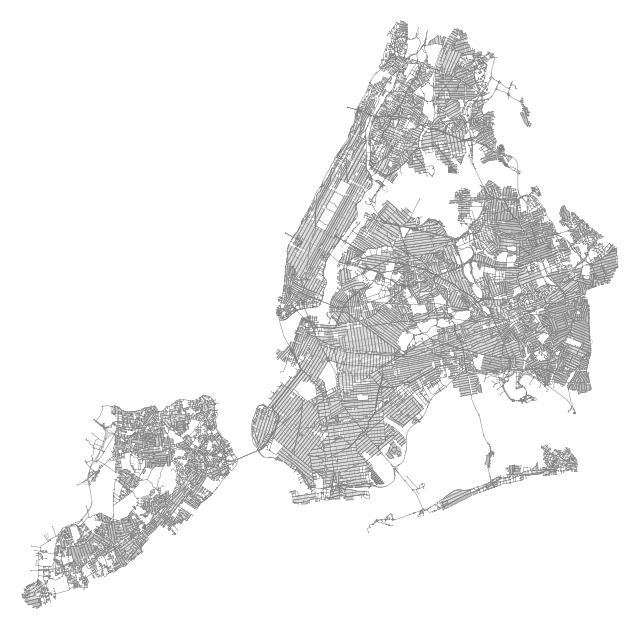

In [4]:
G1 = ox.graph_from_place("New York City, New York, USA", network_type="drive",simplify=True)
fig, ax = ox.plot_graph(G1,node_size=0.5, bgcolor='white', node_color='gray', edge_color="gray", edge_linewidth=0.2)

In [5]:
G2 = ox.graph_from_place("Alameda County, California, USA", network_type="drive", simplify=True)

In [6]:
gdf1 = ox.geocode_to_gdf("New York City, New York, USA")
area1 = ox.projection.project_gdf(gdf1).unary_union.area

In [7]:
# calculate basic and extended network stats, merge them together, and display
stats1 = ox.basic_stats(G1, area=area1)
stats_ny = pd.Series(stats1)
stats_ny

n                                                                           55339
m                                                                          139574
k_avg                                                                    5.044327
edge_length_total                                                    16163921.049
edge_length_avg                                                        115.808969
streets_per_node_avg                                                     3.321021
streets_per_node_counts         {0: 0, 1: 3656, 2: 293, 3: 26666, 4: 24133, 5:...
streets_per_node_proportions    {0: 0.0, 1: 0.06606552341025317, 2: 0.00529463...
intersection_count                                                          51683
street_length_total                                                  11185954.218
street_segment_count                                                        91902
street_length_avg                                                      121.716113
circuity_avg    

In [8]:
gdf2 = ox.geocode_to_gdf("Alameda County, California, USA")
area2 = ox.projection.project_gdf(gdf2).unary_union.area

In [9]:
# calculate basic and extended network stats, merge them together, and display
stats2 = ox.basic_stats(G2, area=area2)
stats_al = pd.Series(stats2)
stats_al

n                                                                           41627
m                                                                          102775
k_avg                                                                    4.937901
edge_length_total                                                    13948767.529
edge_length_avg                                                        135.721406
streets_per_node_avg                                                     2.798112
streets_per_node_counts         {0: 0, 1: 8644, 2: 401, 3: 23677, 4: 8544, 5: ...
streets_per_node_proportions    {0: 0.0, 1: 0.2076536863093665, 2: 0.009633170...
intersection_count                                                          32983
street_length_total                                                    8071492.24
street_segment_count                                                        58396
street_length_avg                                                      138.219951
circuity_avg    

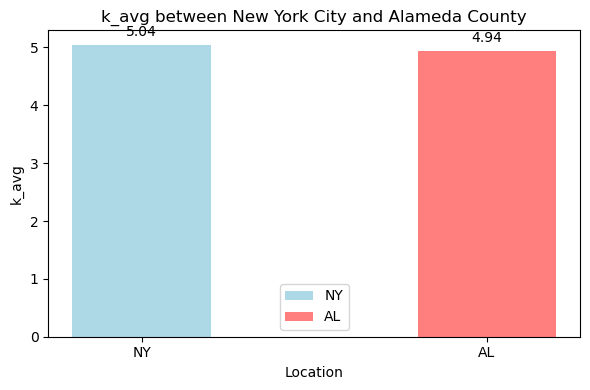

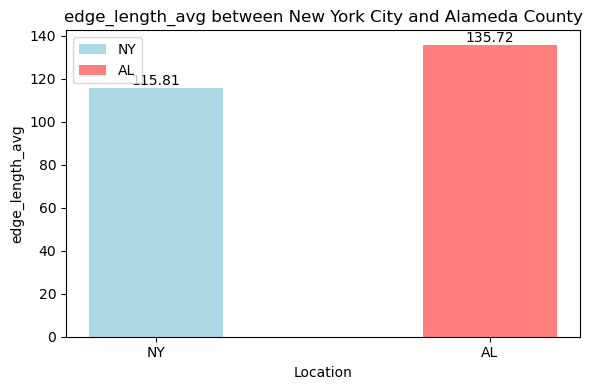

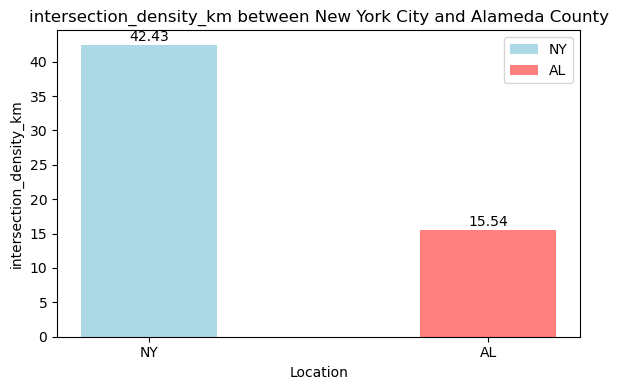

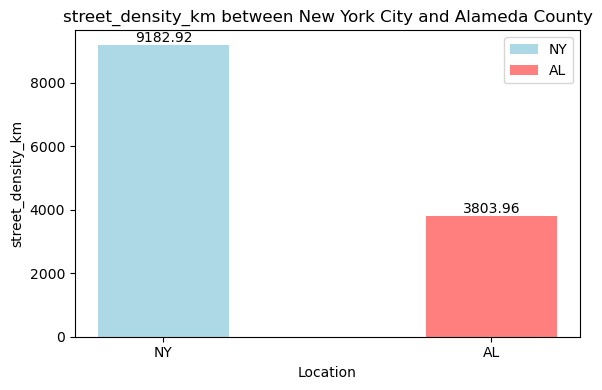

In [18]:
import matplotlib.pyplot as plt
# Extracting keys and values for plotting
keys = ['k_avg', 'edge_length_avg', 'intersection_density_km', 'street_density_km']

# Plotting each metric separately
for key in keys:
    plt.figure(figsize=(6, 4))
    plt.bar('NY', stats_ny[key], color='lightblue', width=0.4, label='NY')
    plt.bar('AL', stats_al[key], color='r', width=0.4, label='AL', alpha=0.5)
    
    # Add text on top of each bar with two decimal places
    plt.text('NY', stats_ny[key] + 0.1, '{:.2f}'.format(stats_ny[key]), ha='center', va='bottom', color='black')
    plt.text('AL', stats_al[key] + 0.1, '{:.2f}'.format(stats_al[key]), ha='center', va='bottom', color='black')
    
    plt.xlabel('Location')
    plt.ylabel(key)
    plt.title(f'{key} between New York City and Alameda County')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [1]:
shapefile_path = 'D:\\2024spring\\UCB_CYPLAN255_2024\\building_p.shp'

In [2]:
import geopandas as gpd
from tqdm import tqdm

# Define the path to the shapefile
shapefile_path = 'D:\\2024spring\\UCB_CYPLAN255_2024\\building_p.shp'

# Print a message before starting the reading process
print("Reading shapefile...")

try:
    # Get the number of features in the shapefile
    total_features = gpd.read_file(shapefile_path).shape[0]
    with tqdm(total=total_features) as pbar:
        # Read the shapefile and iterate over each feature to update the progress bar
        for _ in gpd.read_file(shapefile_path).geometry:
            pbar.update(1)
    
    # Print a message after reading is completed successfully
    print("\nShapefile read successfully.")
    
except Exception as e:
    # Print an error message if reading fails
    print("Error reading shapefile:", str(e))


Reading shapefile...


100%|██████████████████████████████████████████████████████████████████████| 1083339/1083339 [04:08<00:00, 4353.25it/s]


Shapefile read successfully.


In [5]:
gdf = gpd.read_file(shapefile_path)

In [6]:
gdf.head()

,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID,geometry
0,None,3170958,1925.0,2017-08-22,Constructed,96807,29.749853,2100,40.0,3065220021,3065220021,Photogramm,{31298F86-3088-4F53-B3DB-71A9EFA6FA1F},POINT (993484.721 167354.975)
1,None,5028452,1965.0,2017-08-22,Constructed,326368,22.630000,2100,39.0,5012640036,5012640036,Photogramm,{F5F8CDA5-69E2-46F8-8F69-BA95C025B520},POINT (937638.060 172243.420)
2,None,5078368,1970.0,2017-08-22,Constructed,746627,35.760000,2100,51.0,5060190091,5060190091,Photogramm,{9F644794-F72C-4582-9E5E-B337E2B97068},POINT (930013.874 141940.012)
3,None,3245111,1928.0,2017-08-22,Constructed,786626,37.500000,2100,6.0,3086910048,3086910048,Photogramm,{F916B22D-E25B-44AE-9FA9-2A51191B9CDF},POINT (995038.042 149647.268)
4,None,4161096,1950.0,2017-08-22,Constructed,746409,18.015113,2100,93.0,4075020005,4075020005,Photogramm,{525F2C24-616B-4F29-98A3-8FEA5D4B1A7D},POINT (1052324.423 214746.411)


In [7]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
from collections import defaultdict

# Read hexagon geometries from 'hex.csv'
hexs = pd.read_csv('hexes.csv')

In [8]:
import geopandas as gpd
from shapely.wkt import loads

# Read hexagon geometries from 'hexes.csv'
hexagons_df = pd.read_csv('hexes.csv')

# Convert geometry column from WKT strings to Shapely objects
hexagons_df['geometry'] = hexagons_df['geometry'].apply(loads)

# Convert DataFrame to GeoDataFrame
hexagons_gdf = gpd.GeoDataFrame(hexagons_df, geometry='geometry')

In [9]:
hexagons_gdf.head()

,Unnamed: 0,hex_id,geometry
0,0,882a106e0dfffff,"POLYGON ((-74.24006 40.50163, -74.23813 40.506..."
1,1,882a106e63fffff,"POLYGON ((-74.23813 40.50608, -74.24006 40.501..."
2,2,882a106e67fffff,"POLYGON ((-74.24888 40.50840, -74.25081 40.503..."
3,3,882a106e47fffff,"POLYGON ((-74.21910 40.50927, -74.22103 40.504..."
4,4,882a106e6bfffff,"POLYGON ((-74.22985 40.51159, -74.23179 40.507..."


In [10]:
# Check if the 'HEIGHTROOF' column exists in gdf
if 'HEIGHTROOF' not in gdf.columns:
    print("Error: 'HEIGHTROOF' column not found in gdf.")
else:
    print("Found 'HEIGHTROOF' column in gdf.")


Found 'HEIGHTROOF' column in gdf.


In [11]:
selected_cols = ['HEIGHTROOF', 'geometry']

In [12]:
bd = gdf[selected_cols]

In [13]:
bd.head()

,HEIGHTROOF,geometry
0,29.749853,POINT (993484.721 167354.975)
1,22.630000,POINT (937638.060 172243.420)
2,35.760000,POINT (930013.874 141940.012)
3,37.500000,POINT (995038.042 149647.268)
4,18.015113,POINT (1052324.423 214746.411)


In [20]:
bd.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [21]:
bd.crs = 'EPSG:4326'

In [28]:
bd.head()

,HEIGHTROOF,geometry
0,29.749853,POINT (993484.72111 167354.97472)
1,22.630000,POINT (937638.06040 172243.41959)
2,35.760000,POINT (930013.87353 141940.01161)
3,37.500000,POINT (995038.04173 149647.26795)
4,18.015113,POINT (1052324.42285 214746.41111)


In [29]:
bd.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [22]:
hexagons_gdf.crs = 'EPSG:4326'

In [23]:
hexagons_gdf.head()

,Unnamed: 0,hex_id,geometry
0,0,882a106e0dfffff,"POLYGON ((-74.24006 40.50163, -74.23813 40.506..."
1,1,882a106e63fffff,"POLYGON ((-74.23813 40.50608, -74.24006 40.501..."
2,2,882a106e67fffff,"POLYGON ((-74.24888 40.50840, -74.25081 40.503..."
3,3,882a106e47fffff,"POLYGON ((-74.21910 40.50927, -74.22103 40.504..."
4,4,882a106e6bfffff,"POLYGON ((-74.22985 40.51159, -74.23179 40.507..."


ValueError: aspect must be finite and positive 

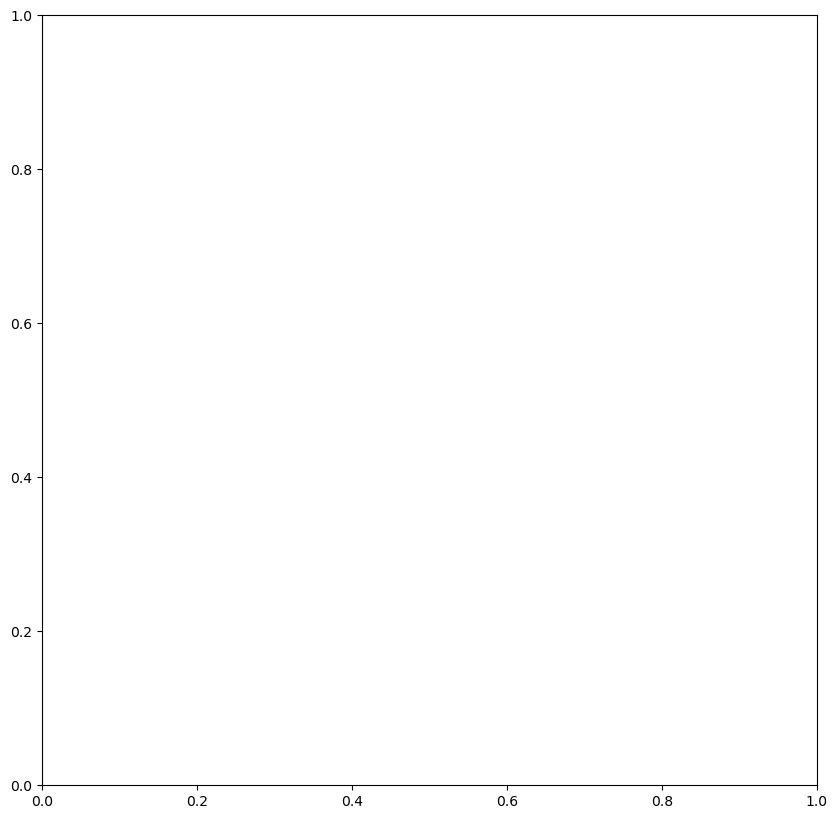

In [40]:
import matplotlib.pyplot as plt

# Plot geometries from bd and hexagons_gdf
fig, ax = plt.subplots(figsize=(10, 10))
bd.plot(ax=ax, color='blue', alpha=0.5, edgecolor='k')


plt.show()


In [35]:
join2 = gpd.sjoin(bd, hexagons_gdf, how="right", predicate="within")

In [36]:
join2

,index_left,HEIGHTROOF,Unnamed: 0,hex_id,geometry
0,NaN,NaN,0,882a106e0dfffff,"POLYGON ((-74.24006 40.50163, -74.23813 40.506..."
1,NaN,NaN,1,882a106e63fffff,"POLYGON ((-74.23813 40.50608, -74.24006 40.501..."
2,NaN,NaN,2,882a106e67fffff,"POLYGON ((-74.24888 40.50840, -74.25081 40.503..."
3,NaN,NaN,3,882a106e47fffff,"POLYGON ((-74.21910 40.50927, -74.22103 40.504..."
4,NaN,NaN,4,882a106e6bfffff,"POLYGON ((-74.22985 40.51159, -74.23179 40.507..."
...,...,...,...,...,...
1055,NaN,NaN,1055,882a100a51fffff,"POLYGON ((-73.89691 40.89341, -73.89889 40.888..."
1056,NaN,NaN,1056,882a100a55fffff,"POLYGON ((-73.91215 40.89919, -73.90773 40.895..."
1057,NaN,NaN,1057,882a100a5dfffff,"POLYGON ((-73.89935 40.90129, -73.90133 40.896..."
1058,NaN,NaN,1058,882a1018b7fffff,"POLYGON ((-73.89097 40.90681, -73.89295 40.902..."


In [55]:
avg_height_per_hex = join.groupby('hex_id')['HEIGHTROOF'].mean()

In [56]:
avg_height_per_hex

hex_id
882a100005fffff    18.346871
882a100007fffff    23.235271
882a10000bfffff    12.453333
882a100025fffff    47.043023
882a100027fffff    21.562249
                     ...    
882a107759fffff    39.949290
882a10775bfffff    35.584322
882a10775dfffff    28.024628
882a107769fffff    30.262511
882a10776dfffff    29.297339
Name: HEIGHTROOF, Length: 1034, dtype: float64

In [57]:
hexagons_gdf = hexagons_gdf.merge(avg_height_per_hex, left_on='hex_id', right_index=True)

In [59]:
hexagons_gdf.head()

,Unnamed: 0,hex_id,geometry,HEIGHTROOF
0,0,882a106e0dfffff,"POLYGON ((-74.24006 40.50163, -74.23813 40.506...",26.453873
1,1,882a106e63fffff,"POLYGON ((-74.23813 40.50608, -74.24006 40.501...",25.280153
2,2,882a106e67fffff,"POLYGON ((-74.24888 40.50840, -74.25081 40.503...",24.044420
3,3,882a106e47fffff,"POLYGON ((-74.21910 40.50927, -74.22103 40.504...",24.159329
4,4,882a106e6bfffff,"POLYGON ((-74.22985 40.51159, -74.23179 40.507...",25.562094


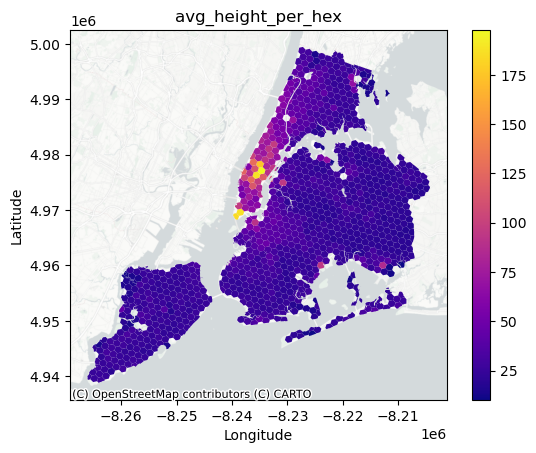

In [61]:
import geopandas as gpd

# Assuming your original data already has a CRS specified, set it to the GeoDataFrame
hexagons_gdf.crs = 'EPSG:4326'  # Assuming your original CRS is EPSG:4326 (WGS84)

# Now you can convert the geometries to EPSG:3857 and plot them
ax = hexagons_gdf.to_crs(epsg=3857).plot(column='HEIGHTROOF', cmap='plasma', legend=True)
cx.add_basemap(ax, crs='epsg:3857', source=cx.providers.CartoDB.PositronNoLabels)
plt.title('avg_height_per_hex')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

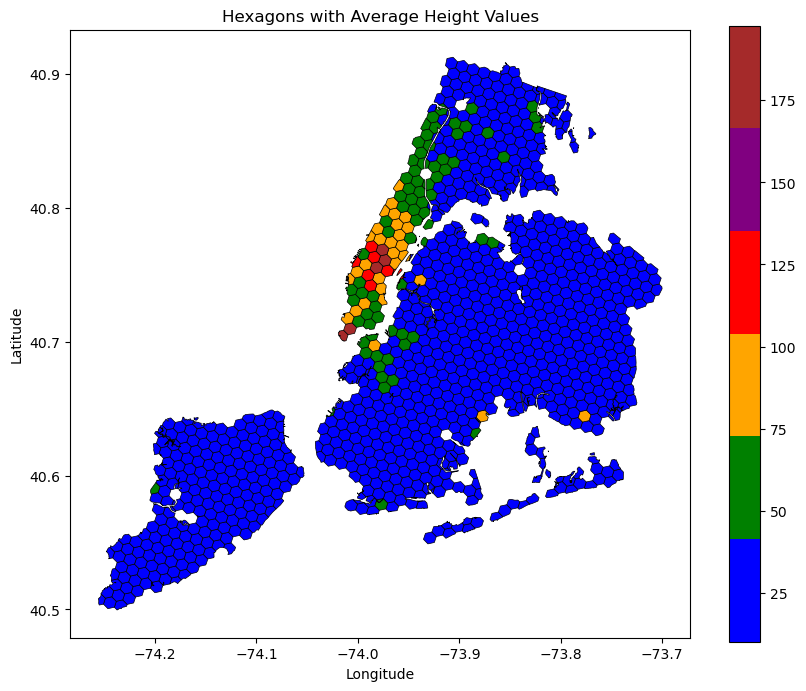

In [62]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Assuming hexagons_gdf is your GeoDataFrame with polygons and average height values

# Determine the minimum and maximum values of the HEIGHTROOF column
min_height = hexagons_gdf['HEIGHTROOF'].min()
max_height = hexagons_gdf['HEIGHTROOF'].max()

# Define the color ranges and colors for each range
color_ranges = [i * 25 for i in range(int(max_height / 25) + 1)]
colors = ['blue', 'green', 'orange', 'red', 'purple', 'brown']

# Create a colormap with different colors for each range of 25 values
cmap = ListedColormap(colors)

# Plot the hexagons with average height values using the custom colormap
fig, ax = plt.subplots(figsize=(10, 8))
hexagons_gdf.plot(column='HEIGHTROOF', cmap=cmap, linewidth=0.5, ax=ax, edgecolor='black', legend=True)
plt.title('Hexagons with Average Height Values')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [63]:
import pandas as pd

# Assuming hexagons_gdf is your GeoDataFrame with polygons and average height values

# Define the number of height ranges and the range size
num_ranges = int(hexagons_gdf['HEIGHTROOF'].max() / 25) + 1
range_size = 25

# Calculate the height distribution
height_distribution = hexagons_gdf['HEIGHTROOF'].value_counts(bins=num_ranges, sort=False, normalize=True)

# Create a DataFrame to store the height distribution
height_distribution_df = pd.DataFrame({'Height Range': height_distribution.index, 'Proportion': height_distribution.values})

# Format the height range to show the range boundaries
height_distribution_df['Height Range'] = height_distribution_df['Height Range'].apply(lambda x: f'{int(x.left)} - {int(x.right)}')

# Sort the DataFrame by the height range
height_distribution_df = height_distribution_df.sort_values(by='Height Range')

# Display the height distribution table
print("Height Distribution Proportion Table:")
print(height_distribution_df)


Height Distribution Proportion Table:
  Height Range  Proportion
0      10 - 33    0.811412
4    103 - 127    0.005803
5    127 - 150    0.000967
6    150 - 174    0.000967
7    174 - 197    0.003868
1      33 - 57    0.124758
2      57 - 80    0.034816
3     80 - 103    0.017408


In [64]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [65]:
from tabulate import tabulate

# Assuming height_distribution_df is your DataFrame containing the height distribution

# Convert the DataFrame to a list of lists for tabulate
table_data = height_distribution_df.values.tolist()

# Get the column headers
headers = height_distribution_df.columns.tolist()

# Print the table with borders
print(tabulate(table_data, headers=headers, tablefmt="fancy_grid"))


╒════════════════╤══════════════╕
│ Height Range   │   Proportion │
╞════════════════╪══════════════╡
│ 10 - 33        │  0.811412    │
├────────────────┼──────────────┤
│ 103 - 127      │  0.00580271  │
├────────────────┼──────────────┤
│ 127 - 150      │  0.000967118 │
├────────────────┼──────────────┤
│ 150 - 174      │  0.000967118 │
├────────────────┼──────────────┤
│ 174 - 197      │  0.00386847  │
├────────────────┼──────────────┤
│ 33 - 57        │  0.124758    │
├────────────────┼──────────────┤
│ 57 - 80        │  0.0348162   │
├────────────────┼──────────────┤
│ 80 - 103       │  0.0174081   │
╘════════════════╧══════════════╛


In [66]:
from tabulate import tabulate

# Assuming height_distribution_df is your DataFrame containing the height distribution

# Convert the DataFrame to a list of lists for tabulate
table_data = height_distribution_df.values.tolist()

# Get the column headers
headers = height_distribution_df.columns.tolist()

# Print the table with solid grid
print(tabulate(table_data, headers=headers, tablefmt="pretty"))


+--------------+-----------------------+
| Height Range |      Proportion       |
+--------------+-----------------------+
|   10 - 33    |   0.811411992263056   |
|  103 - 127   | 0.005802707930367505  |
|  127 - 150   | 0.0009671179883945841 |
|  150 - 174   | 0.0009671179883945841 |
|  174 - 197   | 0.0038684719535783366 |
|   33 - 57    |  0.12475822050290135  |
|   57 - 80    |  0.03481624758220503  |
|   80 - 103   | 0.017408123791102514  |
+--------------+-----------------------+
